In [ ]:
pip install newspaper3k

In [ ]:
pip install google-search-results

# **Import Libraries**

In [ ]:
import pandas as pd
import tensorflow as tf
import torch
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import os
import numpy as np
import re
import string
import json
import requests
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from serpapi import GoogleSearch
from collections import Counter
from newspaper import Article
from datetime import datetime

#Deep learning libraries
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


# **Importing the dataset**

In [ ]:
true_data = pd.read_csv('/content/drive/MyDrive/True.csv/True.csv')
true_data

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...     worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...     worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...     worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...     worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...     worldnews   

                     date  
0      December 31, 2017   
1      December 29, 2017   
2      December 31, 2017   
3      December 30, 2017   
4      December 29, 2017   
...                   ...  
21412    August 22, 2017   
21413    August 22, 2017   
21414    August 22, 2017   
21415    August 22, 2017   
21416    August 22, 2017   

[21417 rows x 4 columns]

In [ ]:
fake_data = pd.read_csv("/content/drive/MyDrive/Fake.csv/Fake.csv")
fake_data

title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...         News   
3      On Christmas day, Donald Trump announced that ...         News   
4      Pope Francis used his annual Christmas Day mes...         News   
...                                                  ...          ...   
23476  21st Century Wire says As 21WIRE reported earl...  Middle-east   
23477  21st Century Wire says It s a familiar theme. ...  Middle-east   
23478  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
23479  21st Century Wire says Al Jazeera America will...  Middle-east   
23480  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                    date  
0      December 31, 2017  
1      December 31, 2017  
2      December 30, 2017  
3      December 29, 2017  
4      December 25, 2017  
...                  ...  
23476   January 16, 2016  
23477   January 16, 2016  
23478   January 15, 2016  
23479   January 14, 2016  
23480   January 12, 2016  

[23481 rows x 4 columns]

# **Preprocessing and Cleaning**

In [ ]:
true_data['Real/Fake']=1
fake_data['Real/Fake']=0

In [ ]:
news_dataset = pd.concat([true_data,fake_data])

In [ ]:
news_dataset['news']=news_dataset['title']+' '+news_dataset['text']

In [ ]:
news_dataset=news_dataset[['news','Real/Fake']]

In [ ]:
news_dataset = news_dataset.reset_index(drop=True)

In [ ]:
news_dataset['news'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

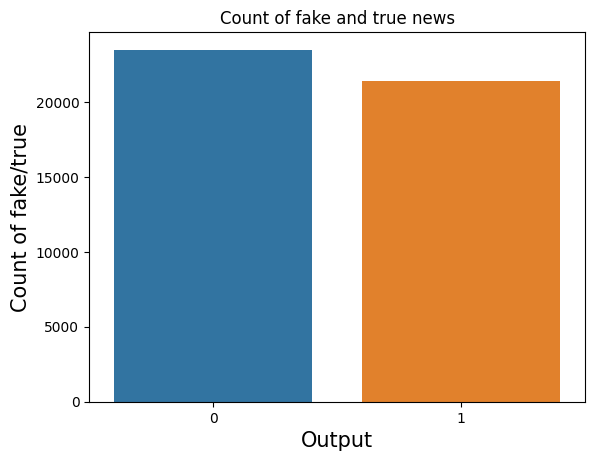

In [ ]:
ax=sns.countplot(x="Real/Fake", data=news_dataset)

#Setting labels and font size
ax.set(xlabel='Output', ylabel='Count of fake/true',title='Count of fake and true news')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

# **Text Processing**

In [ ]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
news_dataset['news']=news_dataset['news'].apply(lambda x:review_cleaning(x))
news_dataset.head()

news  Real/Fake
0  as us budget fight looms republicans flip thei...          1
1  us military to accept transgender recruits on ...          1
2  senior us republican senator let mr mueller do...          1
3  fbi russia probe helped by australian diplomat...          1
4  trump wants postal service to charge much more...          1

In [ ]:
stop = stopwords.words('english')
news_dataset['news'] = news_dataset['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
news_dataset.head()

news  Real/Fake
0  us budget fight looms republicans flip fiscal ...          1
1  us military accept transgender recruits monday...          1
2  senior us republican senator let mr mueller jo...          1
3  fbi russia probe helped australian diplomat ti...          1
4  trump wants postal service charge much amazon ...          1

# **Visualization**

trump 141178
said 130261
us 68206
would 55425
president 53495
people 41778
one 36287
state 33306
new 32669
also 31209
obama 30037
clinton 29107
house 29074
reuters 28822
donald 28441
government 27481
states 26398
republican 25380
could 24368
white 23858


<Axes: title={'center': 'Top 20 words in news'}, xlabel='news'>

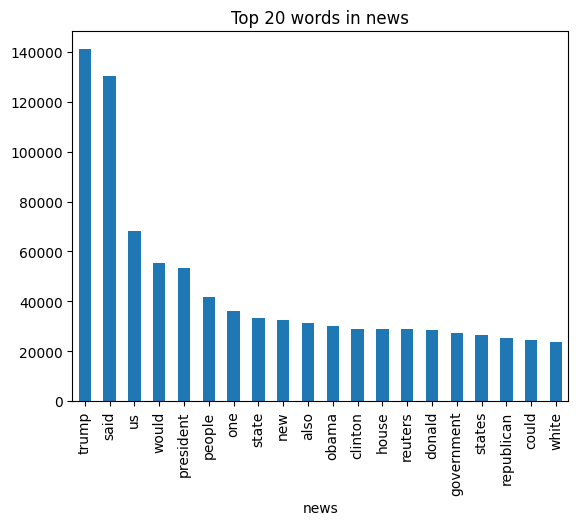

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_words(news_dataset['news'], 20)

#Printing the word and frequency
for word, freq in common_words:
    print(word, freq)

#Creating the dataframe of word and frequency
df1 = pd.DataFrame(common_words, columns = ['news' , 'count'])

#Group by words and plot the sum
df1.groupby('news').sum()['count'].sort_values(ascending=False).plot(kind='bar', title='Top 20 words in news')

# **WordCloud of Fake and True News**

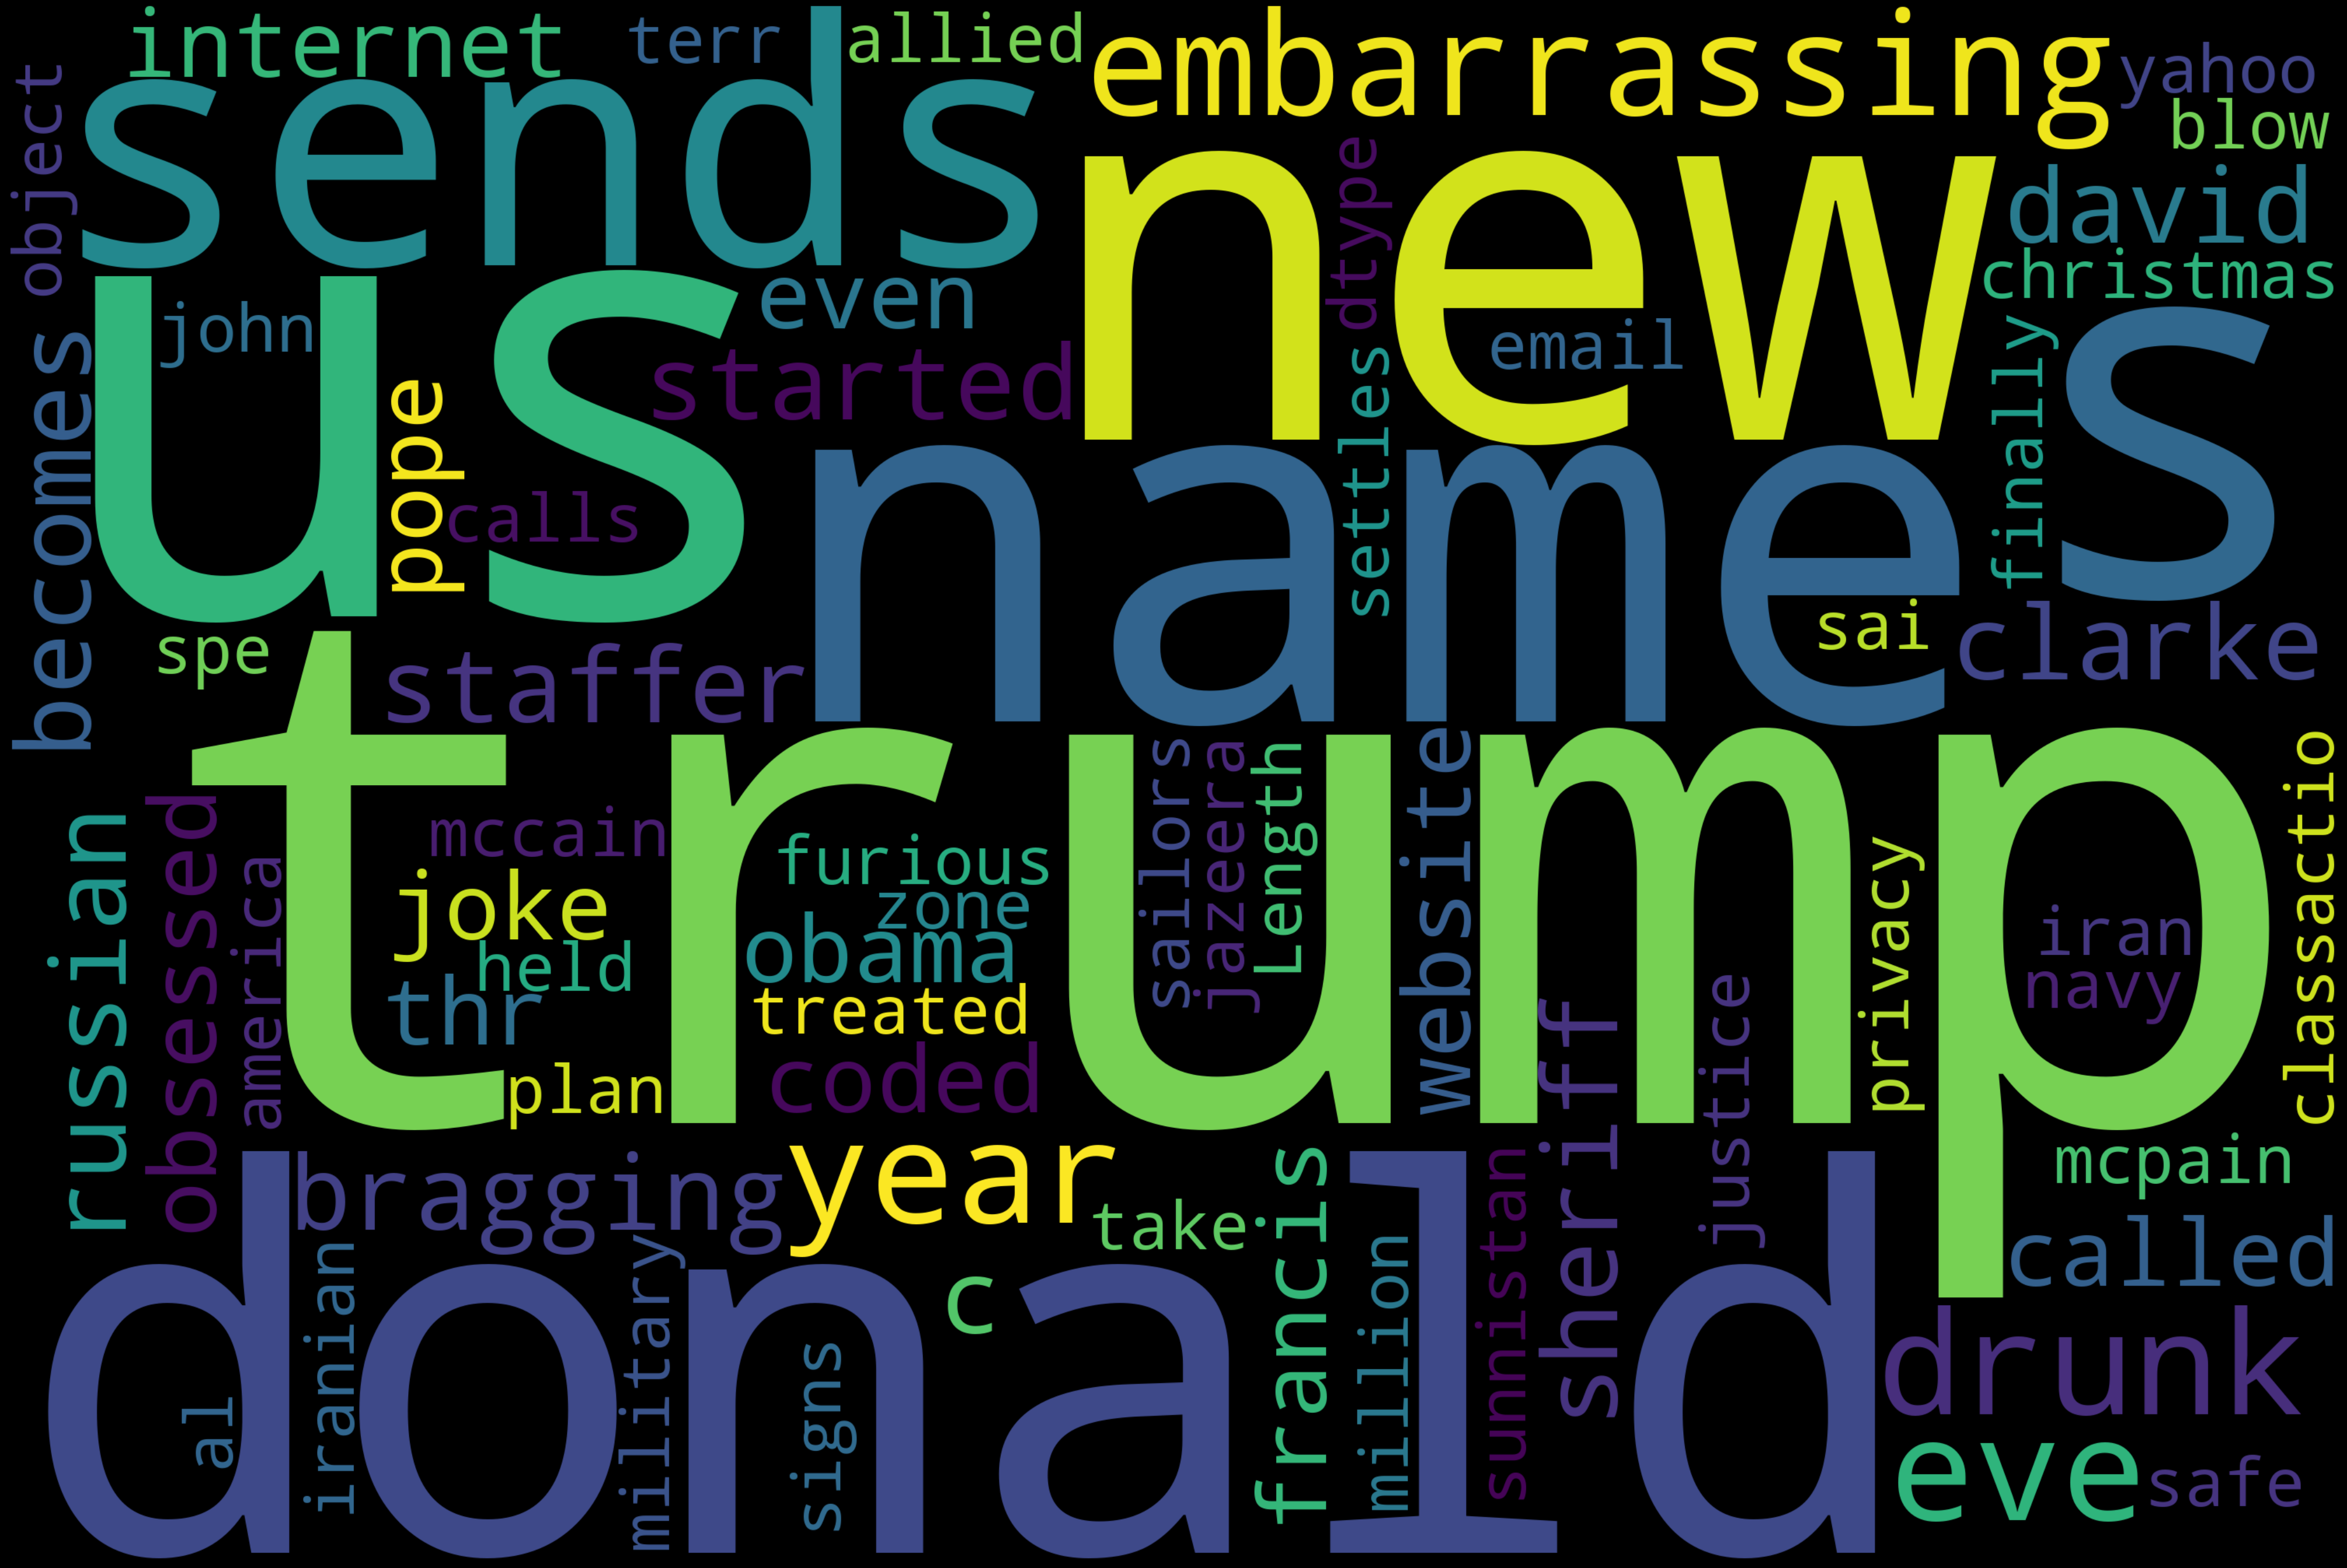

In [ ]:
text = news_dataset.loc[news_dataset['Real/Fake']==0]["news"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

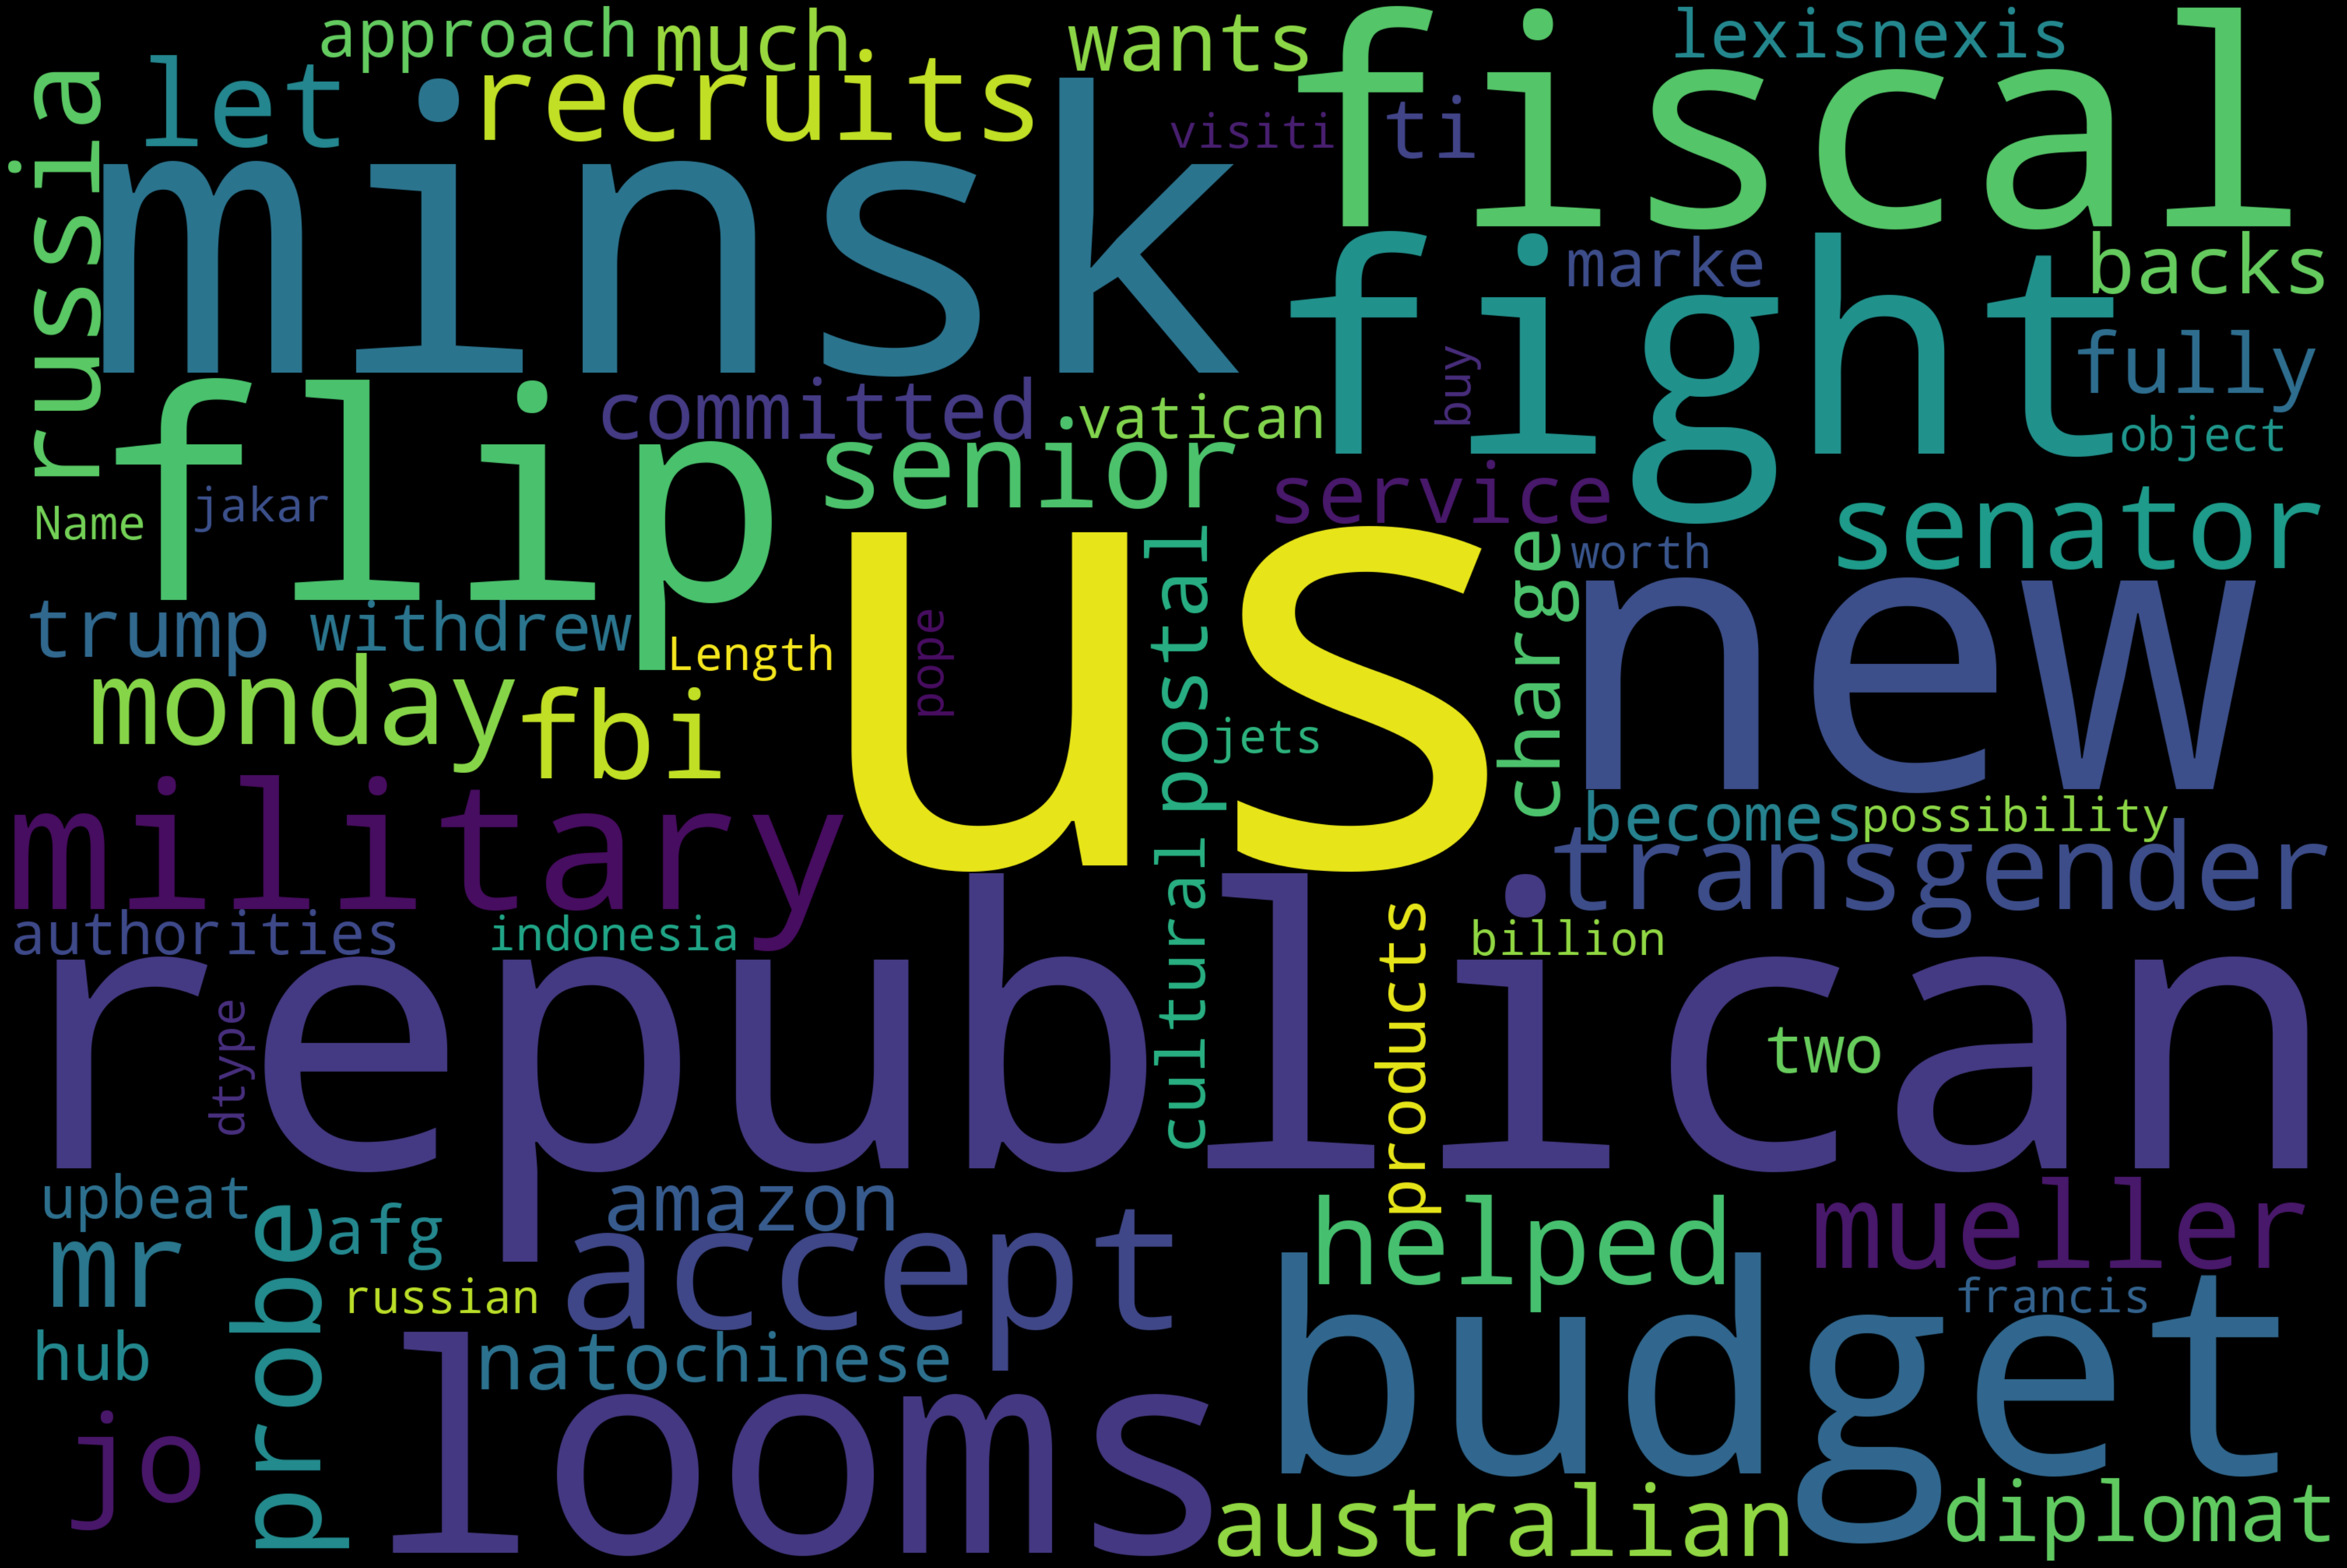

In [ ]:
text = news_dataset.loc[news_dataset['Real/Fake']==1]["news"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# **TFIDF(Term Frequency — Inverse Document Frequency)**

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=500,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(news_dataset['news'])
X.shape

(44898, 500)

In [ ]:
y=news_dataset['Real/Fake']
print(f'Original dataset shape : {Counter(y)}')

Original dataset shape : Counter({0: 23481, 1: 21417})


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# **Model Building**

In [ ]:
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
nb_cv=MultinomialNB(alpha=0.1)
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2: 'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,nb_cv]

#Printing the accuracy
for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.9476142622326984
Decision Tree Test Accuracy: 0.9387491174913585
Naive Bayes Test Accuracy: 0.9146285971994892


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# **Logistic Regression with Hyperparameter Tuning**

In [ ]:
logreg = LogisticRegression(C=24.420530945486497, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.96


Confusion matrix, without normalization


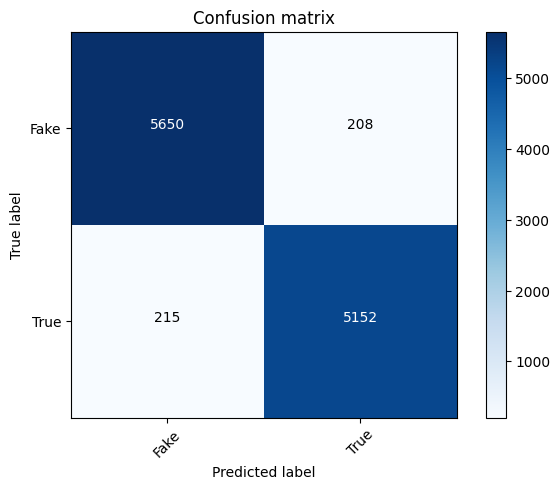

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Fake','True'])

In [ ]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      5858
           1       0.96      0.96      0.96      5367

    accuracy                           0.96     11225
   macro avg       0.96      0.96      0.96     11225
weighted avg       0.96      0.96      0.96     11225



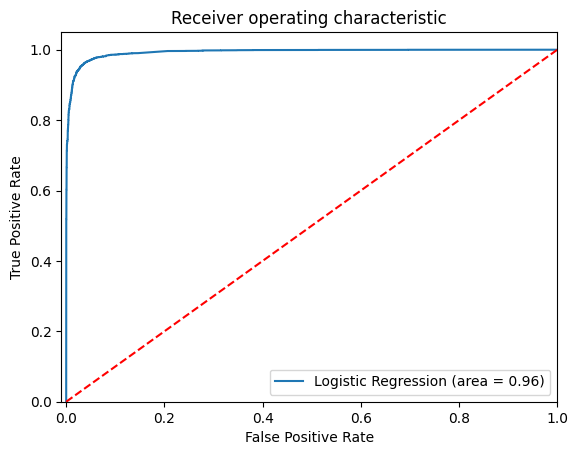

In [ ]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# **Naive Bayes**

In [ ]:
nb_model = MultinomialNB(alpha=0.1)
nb_model.fit(X_train, y_train)

# Predictions and Accuracy
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = nb_model.score(X_test, y_test)
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(accuracy_nb))

Accuracy of Naive Bayes classifier on test set: 0.94


Confusion matrix, without normalization


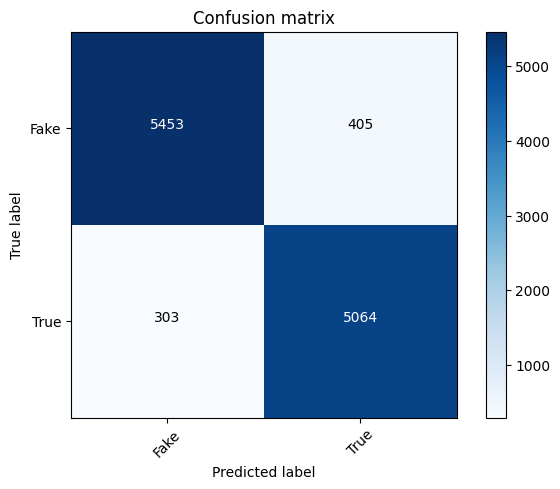

In [ ]:
# Create a confusion matrix
cm_nb = metrics.confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix
plot_confusion_matrix(cm_nb, classes=['Fake', 'True'])

In [ ]:
print("Classification Report:\n",classification_report(y_test, y_pred_nb))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      5858
           1       0.93      0.94      0.93      5367

    accuracy                           0.94     11225
   macro avg       0.94      0.94      0.94     11225
weighted avg       0.94      0.94      0.94     11225



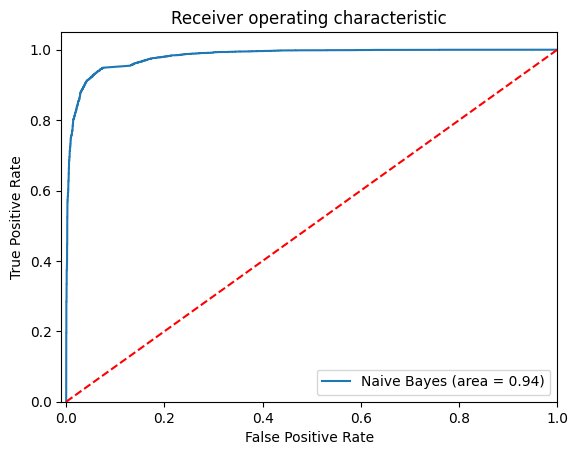

In [ ]:
roc_auc_nb = roc_auc_score(y_test, nb_model.predict(X_test))
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# **Decision Tree**

In [ ]:
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)

# Predictions and Accuracy
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test, y_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(accuracy_dt))

Accuracy of Decision Tree classifier on test set: 0.95


Confusion matrix, without normalization


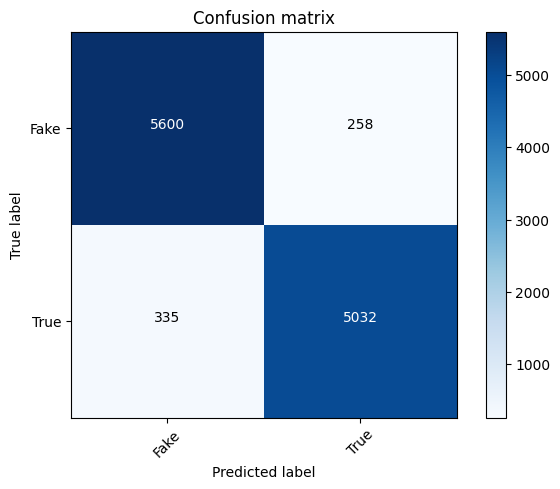

In [ ]:
cm_dt = metrics.confusion_matrix(y_test, y_pred_dt)
plot_confusion_matrix(cm_dt, classes=['Fake','True'])  # Define your plot_confusion_matrix function
plt.show()

In [ ]:
classification_rep_dt = classification_report(y_test, y_pred_dt)
print("Classification Report:\n", classification_rep_dt)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      5858
           1       0.95      0.94      0.94      5367

    accuracy                           0.95     11225
   macro avg       0.95      0.95      0.95     11225
weighted avg       0.95      0.95      0.95     11225



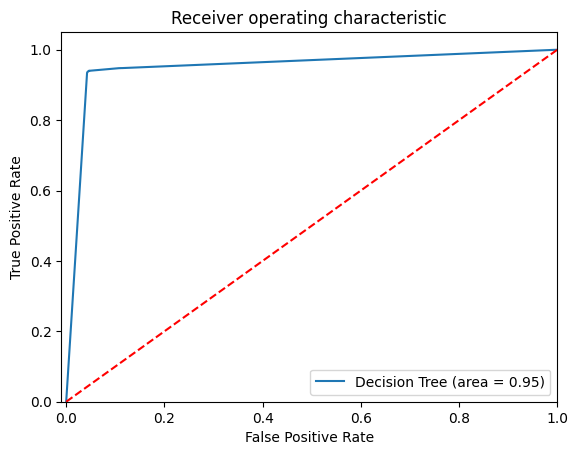

In [ ]:
roc_auc_dt = roc_auc_score(y_test, dt_model.predict(X_test))
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# **LSTM Model**

In [ ]:
#LSTM Model
tokenizer = Tokenizer()
tokenizer.fit_on_texts(news_dataset["news"])
sequences = tokenizer.texts_to_sequences(news_dataset["news"])
max_sequence_length = 1000
X = pad_sequences(sequences, maxlen=max_sequence_length)
y = news_dataset["Real/Fake"]

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
embedding_dim = 100
lstm_units = 128

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(lstm_units))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Train the model
epochs = 6  # Adjust the number of epochs based on preference
batch_size = 32  # Adjust the batch size based on preference
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 100)         22612400  
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 22,737,969
Trainable params: 22,737,969
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/6
1123/1123 [================

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = (y_pred > 0.55).astype("int32")

281/281 [==============================] - 4s 13ms/step


Confusion matrix, without normalization


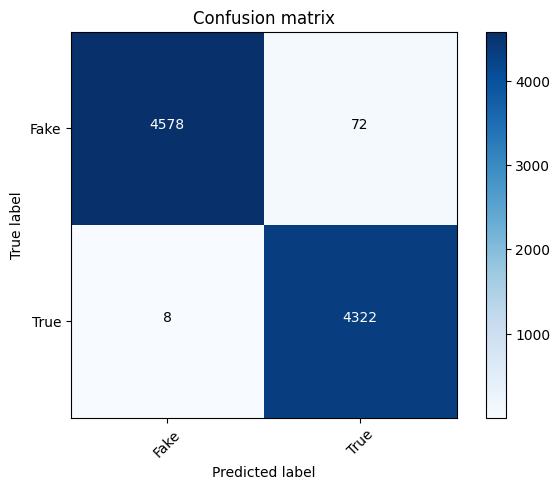

In [ ]:
cm = metrics.confusion_matrix(y_val, y_pred_classes)
plot_confusion_matrix(cm,classes=['Fake','True'])

In [ ]:
accuracy_score(y_val,y_pred_classes)

0.9910913140311804

In [ ]:
print(classification_report(y_val,y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4650
           1       0.98      1.00      0.99      4330

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



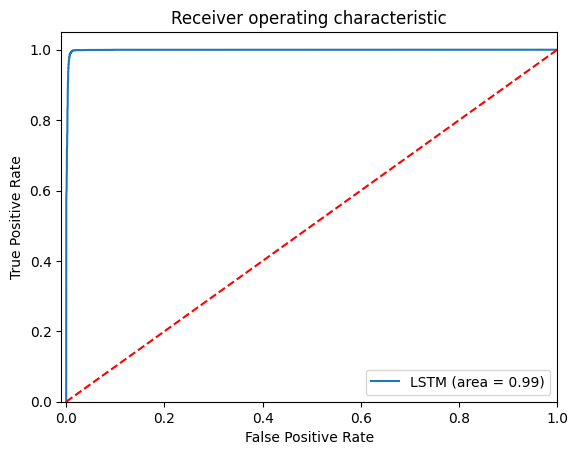

In [ ]:
lstm_roc_auc = roc_auc_score(y_val,y_pred_classes)
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='LSTM (area = %0.2f)' % lstm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# **Web Scraping**

In [ ]:
def parse_date(date_str):
    try:
        return datetime.strptime(date_str, "%d/%m/%Y")
    except ValueError:
        try:
            return datetime.strptime(date_str, "%d/%m/%Y")
        except ValueError:
            raise ValueError("Invalid date format. Please use dd/mm/yyyy format.")

In [ ]:
print("Enter query to be Searched:")
g_query=input()


# Read the "from" and "to" dates separately in the format "dd/mm/yyyy"
from_date_str = input("Enter the from date (in the form dd/mm/yyyy): ")
to_date_str = input("Enter the to date (in the form dd/mm/yyyy): ")

from_date = parse_date(from_date_str)
to_date = parse_date(to_date_str)

# Format the dates as "d m Y"
from_date_formatted = from_date.strftime("%d %m %Y")
to_date_formatted = to_date.strftime("%d %m %Y")

from_day, from_month, from_year = map(int, from_date_formatted.split(" "))
to_day, to_month, to_year = map(int, to_date_formatted.split(" "))

Enter query to be Searched:
Donald Trump
Enter the from date (in the form dd/mm/yyyy): 10/07/2023
Enter the to date (in the form dd/mm/yyyy): 10/08/2023


In [ ]:
import requests
from requests.exceptions import Timeout
from bs4 import BeautifulSoup
import pandas as pd
from serpapi import GoogleSearch
from newspaper import Article

# Set your SerpApi API key here or use an environment variable
API_KEY = "240964cbcee02ec9e89d024dda41f75ee86e38a8bce516346684b2c83416fc58"

def is_video_page(html_content, url):
    # Check for video elements or patterns in the page content or URL
    soup = BeautifulSoup(html_content, 'html.parser')
    video_elements = soup.select('iframe[src*="youtube.com"], iframe[src*="youtu.be"], video')
    if len(video_elements) > 0:
        return True
    return "youtube" in url.lower() or "video" in url.lower() or "/videos/" in url.lower()

def scrape_article_text(url):
    try:
        article = Article(url)
        article.download()
        article.parse()
        return article.text.strip()
    except Exception as e:
        print(f"Error: {e}")
        return None

def get_web_page_content(url, timeout=10):
    try:
        response = requests.get(url, timeout=timeout)

        # Raise an exception if the status code indicates an error
        response.raise_for_status()

        # Return the content of the page if the request is successful
        return response.text

    except Timeout:
        print(f"Timeout occurred while accessing URL: {url}")
    except requests.exceptions.RequestException as e:
        print(f"Error occurred while accessing URL: {url}\nError: {e}")

    return None


def get_news_results(query, from_day, from_month, from_year, to_day, to_month, to_year):
    params = {
        "engine": "google",
        "q": query,
        "google_domain": "google.com",
        "tbm": "nws",
        "tbs": f"cdr:1,cd_min:{from_month}/{from_day}/{from_year},cd_max:{to_month}/{to_day}/{to_year}",
        "api_key": API_KEY,
        "num": 120,  # Set the number of results to 120
    }

    try:
        client = GoogleSearch(params)
        data = client.get_dict()

        # Create an empty list to store the news data
        news_data = []

        for result in data['news_results']:
            # Check if the result is not a video or photo (type attribute not present or not 'video'/'image')
            if 'type' not in result or result['type'] not in ['video', 'image']:
                title = result['title']
                snippet = result['snippet']
                date = result['date']
                link = result['link']

                # Fetch the HTML content of the article page with a timeout of 5 seconds
                html_content = get_web_page_content(link, timeout=5)

                # Check if the article is not a video page and the content is not None (using is_video_page function)
                if html_content is not None and not is_video_page(html_content, link):
                    # Scrape the full article text from the link using beautifulsoup4
                    article_text = scrape_article_text(link)

                    # Append each article's information as a dictionary to the list
                    if article_text is not None:
                        news_data.append({
                            "Title": title,
                            "Snippet": snippet,
                            "Date": date,
                            "Link": link,
                            "Text": article_text
                        })

        # Convert the list of dictionaries to a DataFrame using pandas.concat
        news_data_df = pd.DataFrame(news_data)

        return news_data_df

    except Exception as e:
        print("Error:", e)
        return None

if __name__ == "__main__":
    query = g_query
    news_data = get_news_results(query, from_day, from_month, from_year, to_day, to_month, to_year)

    if news_data is not None:
        print(news_data)


Error occurred while accessing URL: https://www.nytimes.com/2023/07/28/opinion/ron-desantis-trump-campaign.html
Error: 403 Client Error: Forbidden for url: https://www.nytimes.com/2023/07/28/opinion/ron-desantis-trump-campaign.html
Error occurred while accessing URL: https://www.nytimes.com/2023/08/08/opinion/trump-indictment-cost-danger.html
Error: 403 Client Error: Forbidden for url: https://www.nytimes.com/2023/08/08/opinion/trump-indictment-cost-danger.html
Error occurred while accessing URL: https://thehill.com/homenews/senate/4133996-cruz-judge-assigned-to-jan-6-case-relentlessly-hostile-to-donald-trump/
Error: 403 Client Error: Forbidden for url: https://thehill.com/homenews/senate/4133996-cruz-judge-assigned-to-jan-6-case-relentlessly-hostile-to-donald-trump/
Error occurred while accessing URL: https://www.nytimes.com/2023/07/31/briefing/donald-trump-polls-florida-coral.html
Error: 403 Client Error: Forbidden for url: https://www.nytimes.com/2023/07/31/briefing/donald-trump-pol

In [ ]:
news_data=news_data.drop(news_data[news_data['Text']==''].index).reset_index(drop=True)
news_data

Title  \
0   Donald Trump indictment news: What to know abo...   
1   Donald Trump has been indicted in special coun...   
2   Trump pleads not guilty to federal charges tha...   
3   Donald Trump pleads not guilty to January 6-re...   
4   Trump pleads not guilty of plotting to overtur...   
..                                                ...   
69  Dane County judge allows civil case against fa...   
70  Digital World extends deadline for merger with...   
71  Newsmax Interviewed Donald Trump & Then Slamme...   
72            Opinion | Donald Trump Is Our Huey Long   
73  Is It Possible Trump Will Strike a Plea Deal t...   

                                              Snippet          Date  \
0   Former President Donald Trump was indicted Tue...    1 week ago   
1   Trump's March indictment marked the first time...    1 week ago   
2   WASHINGTON (AP) — Donald Trump pleaded not gui...    1 week ago   
3   Former President Donald Trump has pleaded not ...    1 week ago   
4   WASHINGTON, Aug 3 (Reuters) - Donald Trump ple...    1 week ago   
..                                                ...           ...   
69  Rejecting a move to dismiss the case, a judge ...  22 hours ago   
70  Former U.S. President and Republican president...     1 day ago   
71  Newsmax Interviewed Donald Trump & Then Slamme...     1 day ago   
72  Huey Pierce Long, the American Politician and ...     1 day ago   
73  We do not know how the slew of criminal charge...     1 day ago   

                                                 Link  \
0   https://www.npr.org/2023/08/02/1191507967/trum...   
1   https://www.cnn.com/2023/08/01/politics/donald...   
2   https://apnews.com/article/trump-indicted-jan-...   
3   https://www.cnn.com/2023/08/03/politics/arraig...   
4   https://www.reuters.com/legal/trump-appear-cou...   
..                                                ...   
69  https://pbswisconsin.org/news-item/dane-county...   
70  https://www.reuters.com/markets/deals/digital-...   
71  https://www.yahoo.com/entertainment/newsmax-in...   
72  https://www.politico.com/news/magazine/2023/08...   
73  https://nymag.com/intelligencer/2023/08/will-d...   

                                                 Text  
0   5 things to know about the latest charges agai...  
1   CNN —\n\nDonald Trump has been indicted on cri...  
2   WASHINGTON (AP) — Donald Trump pleaded not gui...  
3   CNN —\n\nFormer President Donald Trump has ple...  
4   WASHINGTON, Aug 3 (Reuters) - Donald Trump ple...  
..                                                ...  
69  MADISON, Wis. (AP) — A Wisconsin judge on Aug....  
70  Former U.S. President and Republican president...  
71  If you purchase an independently reviewed prod...  
72  The similarities between the two suggest that ...  
73  Photo-Illustration: Intelligencer; Photos Gett...  

[74 rows x 5 columns]

In [ ]:
news_data_backup=news_data.copy()
news_data_backup

Title  \
0   Donald Trump indictment news: What to know abo...   
1   Donald Trump has been indicted in special coun...   
2   Trump pleads not guilty to federal charges tha...   
3   Donald Trump pleads not guilty to January 6-re...   
4   Trump pleads not guilty of plotting to overtur...   
..                                                ...   
69  Dane County judge allows civil case against fa...   
70  Digital World extends deadline for merger with...   
71  Newsmax Interviewed Donald Trump & Then Slamme...   
72            Opinion | Donald Trump Is Our Huey Long   
73  Is It Possible Trump Will Strike a Plea Deal t...   

                                              Snippet          Date  \
0   Former President Donald Trump was indicted Tue...    1 week ago   
1   Trump's March indictment marked the first time...    1 week ago   
2   WASHINGTON (AP) — Donald Trump pleaded not gui...    1 week ago   
3   Former President Donald Trump has pleaded not ...    1 week ago   
4   WASHINGTON, Aug 3 (Reuters) - Donald Trump ple...    1 week ago   
..                                                ...           ...   
69  Rejecting a move to dismiss the case, a judge ...  22 hours ago   
70  Former U.S. President and Republican president...     1 day ago   
71  Newsmax Interviewed Donald Trump & Then Slamme...     1 day ago   
72  Huey Pierce Long, the American Politician and ...     1 day ago   
73  We do not know how the slew of criminal charge...     1 day ago   

                                                 Link  \
0   https://www.npr.org/2023/08/02/1191507967/trum...   
1   https://www.cnn.com/2023/08/01/politics/donald...   
2   https://apnews.com/article/trump-indicted-jan-...   
3   https://www.cnn.com/2023/08/03/politics/arraig...   
4   https://www.reuters.com/legal/trump-appear-cou...   
..                                                ...   
69  https://pbswisconsin.org/news-item/dane-county...   
70  https://www.reuters.com/markets/deals/digital-...   
71  https://www.yahoo.com/entertainment/newsmax-in...   
72  https://www.politico.com/news/magazine/2023/08...   
73  https://nymag.com/intelligencer/2023/08/will-d...   

                                                 Text  
0   5 things to know about the latest charges agai...  
1   CNN —\n\nDonald Trump has been indicted on cri...  
2   WASHINGTON (AP) — Donald Trump pleaded not gui...  
3   CNN —\n\nFormer President Donald Trump has ple...  
4   WASHINGTON, Aug 3 (Reuters) - Donald Trump ple...  
..                                                ...  
69  MADISON, Wis. (AP) — A Wisconsin judge on Aug....  
70  Former U.S. President and Republican president...  
71  If you purchase an independently reviewed prod...  
72  The similarities between the two suggest that ...  
73  Photo-Illustration: Intelligencer; Photos Gett...  

[74 rows x 5 columns]

In [ ]:
news_data['Text']=news_data['Text'].apply(lambda x:review_cleaning(x))
news_data.head()

Title  \
0  Donald Trump indictment news: What to know abo...   
1  Donald Trump has been indicted in special coun...   
2  Trump pleads not guilty to federal charges tha...   
3  Donald Trump pleads not guilty to January 6-re...   
4  Trump pleads not guilty of plotting to overtur...   

                                             Snippet        Date  \
0  Former President Donald Trump was indicted Tue...  1 week ago   
1  Trump's March indictment marked the first time...  1 week ago   
2  WASHINGTON (AP) — Donald Trump pleaded not gui...  1 week ago   
3  Former President Donald Trump has pleaded not ...  1 week ago   
4  WASHINGTON, Aug 3 (Reuters) - Donald Trump ple...  1 week ago   

                                                Link  \
0  https://www.npr.org/2023/08/02/1191507967/trum...   
1  https://www.cnn.com/2023/08/01/politics/donald...   
2  https://apnews.com/article/trump-indicted-jan-...   
3  https://www.cnn.com/2023/08/03/politics/arraig...   
4  https://www.reuters.com/legal/trump-appear-cou...   

                                                Text  
0   things to know about the latest charges again...  
1  cnn —donald trump has been indicted on crimina...  
2  washington ap — donald trump pleaded not guilt...  
3  cnn —former president donald trump has pleaded...  
4  washington aug  reuters  donald trump pleaded ...

In [ ]:
stop = stopwords.words('english')
news_data['Text'] = news_data['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
news_data.head()

Title  \
0  Donald Trump indictment news: What to know abo...   
1  Donald Trump has been indicted in special coun...   
2  Trump pleads not guilty to federal charges tha...   
3  Donald Trump pleads not guilty to January 6-re...   
4  Trump pleads not guilty of plotting to overtur...   

                                             Snippet        Date  \
0  Former President Donald Trump was indicted Tue...  1 week ago   
1  Trump's March indictment marked the first time...  1 week ago   
2  WASHINGTON (AP) — Donald Trump pleaded not gui...  1 week ago   
3  Former President Donald Trump has pleaded not ...  1 week ago   
4  WASHINGTON, Aug 3 (Reuters) - Donald Trump ple...  1 week ago   

                                                Link  \
0  https://www.npr.org/2023/08/02/1191507967/trum...   
1  https://www.cnn.com/2023/08/01/politics/donald...   
2  https://apnews.com/article/trump-indicted-jan-...   
3  https://www.cnn.com/2023/08/03/politics/arraig...   
4  https://www.reuters.com/legal/trump-appear-cou...   

                                                Text  
0  things know latest charges donald trumpenlarge...  
1  cnn —donald trump indicted criminal charges fe...  
2  washington ap — donald trump pleaded guilty th...  
3  cnn —former president donald trump pleaded gui...  
4  washington aug reuters donald trump pleaded gu...

# **Classifying News using LSTM Model**

In [ ]:
#Prediction using Scraped News
tokenizer = Tokenizer()
tokenizer.fit_on_texts(news_dataset["news"])

# Preprocess the text data in 'Text' column
sequences = tokenizer.texts_to_sequences(news_data["Text"])
max_sequence_length = 1000  # Use the same max_sequence_length as used during training
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Perform prediction
predictions = model.predict(X)

# Convert probabilities to binary classes (1 for Real and 0 for Fake) based on a threshold
threshold = 0.5  # Adjust the threshold as per your preference
predictions_binary = np.where(predictions > threshold, 1, 0)

# Add the predictions to the DataFrame as a new column
news_data["Prediction"] = predictions_binary
news_data['Probability of news being True']=predictions
# Display the DataFrame with the predictions
print(predictions_binary)

3/3 [==============================] - 0s 27ms/step
[[1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]]


In [ ]:
count_zeros = np.count_nonzero(predictions_binary == 0)
count_ones = np.count_nonzero(predictions_binary == 1)

print(f"Count of Fake News: {count_zeros}")
print(f"Count of Real News: {count_ones}")

Count of Fake News: 19
Count of Real News: 55


In [ ]:
news_data['Text']=news_data_backup['Text']

In [ ]:
#True News Predictions
news_data[news_data['Prediction']==1].sort_values(by=['Probability of news being True'], ascending=False)

Title  \
41  Here's where the criminal and civil cases faci...   
51  Trump still not sold on Republican primary debate   
42  Wall Street execs make first bets against Dona...   
38  Trump mocks Chris Christie's weight: 'Don't ca...   
27  Donald Trump criticizes Gov. Reynolds for her ...   
58  Trump says he'll still run if convicted and se...   
28  Facing legal peril, Trump calls on GOP to rall...   
45  Potential jurors share strong feelings about T...   
55  Kari Lake to stump for Donald Trump in Des Moines   
60  Election interference grand jury heard testimo...   
9   Special counsel obtained search warrant for Do...   
69  Dane County judge allows civil case against fa...   
12  Georgia's Broad Racketeering Law May Now Ensna...   
72            Opinion | Donald Trump Is Our Huey Long   
10  Donald Trump case tracker: where does each inv...   
48  Trump just qualified for the first debate. But...   
43  'Co-Conspirator 5': Ken Chesebro and the evolu...   
34  Donald Trump announces Iowa State Fair appearance   
47  Fact check: Breaking down the Chris Christie v...   
30  Prosecutors may not need to show that Trump kn...   
64  About half of US Republicans could spurn Trump...   
56  Donald Trump returns to the campaign trail in ...   
35  Donald Trump loses bid for new trial in E. Jea...   
70  Digital World extends deadline for merger with...   
17  US says it no longer deems Donald Trump immune...   
24  Trump Organization, Michael Cohen settle forme...   
66  Jack White Slams Celebrities for Chatting with...   
2   Trump pleads not guilty to federal charges tha...   
52  Donald Trump's Plan to Make the Presidency Mor...   
46  Donald Trump charges: how they could affect th...   
20  Judge tosses Trump's counterclaim against E. J...   
18               Trump’s legal drama grows by the day   
57  Dozens served in Trump’s Cabinet. Four say he ...   
8   What Mike Pence has said that could be used in...   
40  Donald Trump downplays legal challenges on cam...   
33  Judge nixes Trump's bid to move hush-money cri...   
25  Will the Public Get to Watch Donald Trump on T...   
44  Donald Trump's adviser Boris Epshteyn groped 2...   
65  How Good Is Melania at Managing Donald Trump's...   
36  Nervous Republicans turn to New Hampshire in h...   
6   Donald Trump: threatening social media post fl...   
5   Special counsel brings more charges against Do...   
0   Donald Trump indictment news: What to know abo...   
50  Republicans don't dare criticize Trump over Ja...   
61  Trump attacks special counsel Jack Smith and j...   
39  If Trump committed 'a technical violation of t...   
54  Donald Trump says Dems 'have something' on old...   
68  Special counsel scrutinizing February 2020 mee...   
4   Trump pleads not guilty of plotting to overtur...   
14  Trump, Nauta plead not guilty to new classifie...   
49  DeSantis is planning a campaign reboot as he s...   
16    Does Donald Trump Have to Attend His Own Trial?   
19  Judge dismisses Donald Trump's 'Big Lie' lawsu...   
22  A grand jury sworn in Tuesday could decide whe...   
13  Donald Trump enjoys rising GOP primary poll nu...   

                                              Snippet          Date  \
41  Trump is the first former president in United ...   3 weeks ago   
51  Former President Donald Trump arrives on stage...   4 weeks ago   
42  Financial executives padded the donor rolls of...   4 weeks ago   
38  — Former President Donald Trump mocked Chris C...    2 days ago   
27  DES MOINES, Iowa —. Former President Donald Tr...   1 month ago   
58  Donald Trump is running to be the Republican n...   2 weeks ago   
28  NEW YORK (AP) — At a moment of growing legal p...   2 weeks ago   
45  The former president is not a witness in the t...   3 weeks ago   
55  Arizona Republican Kari Lake, who lost the sta...   1 month ago   
60  Prosecutors from special counsel Jack Smith's ...   3 weeks ago   
9   Special Counsel Jack Smith obtained a search w...    2 days ago   
69 

In [ ]:
# High-confidence Predictions
news_data[news_data['Probability of news being True']>=0.75].sort_values(by=['Probability of news being True'], ascending=False)

Title  \
41  Here's where the criminal and civil cases faci...   
51  Trump still not sold on Republican primary debate   
42  Wall Street execs make first bets against Dona...   
38  Trump mocks Chris Christie's weight: 'Don't ca...   
27  Donald Trump criticizes Gov. Reynolds for her ...   
58  Trump says he'll still run if convicted and se...   
28  Facing legal peril, Trump calls on GOP to rall...   
45  Potential jurors share strong feelings about T...   
55  Kari Lake to stump for Donald Trump in Des Moines   
60  Election interference grand jury heard testimo...   
9   Special counsel obtained search warrant for Do...   
69  Dane County judge allows civil case against fa...   
12  Georgia's Broad Racketeering Law May Now Ensna...   
72            Opinion | Donald Trump Is Our Huey Long   
10  Donald Trump case tracker: where does each inv...   
48  Trump just qualified for the first debate. But...   
43  'Co-Conspirator 5': Ken Chesebro and the evolu...   
34  Donald Trump announces Iowa State Fair appearance   
47  Fact check: Breaking down the Chris Christie v...   
30  Prosecutors may not need to show that Trump kn...   
64  About half of US Republicans could spurn Trump...   
56  Donald Trump returns to the campaign trail in ...   
35  Donald Trump loses bid for new trial in E. Jea...   
70  Digital World extends deadline for merger with...   
17  US says it no longer deems Donald Trump immune...   
24  Trump Organization, Michael Cohen settle forme...   
66  Jack White Slams Celebrities for Chatting with...   
2   Trump pleads not guilty to federal charges tha...   
52  Donald Trump's Plan to Make the Presidency Mor...   
46  Donald Trump charges: how they could affect th...   
20  Judge tosses Trump's counterclaim against E. J...   
18               Trump’s legal drama grows by the day   
57  Dozens served in Trump’s Cabinet. Four say he ...   
8   What Mike Pence has said that could be used in...   
40  Donald Trump downplays legal challenges on cam...   
33  Judge nixes Trump's bid to move hush-money cri...   
25  Will the Public Get to Watch Donald Trump on T...   
44  Donald Trump's adviser Boris Epshteyn groped 2...   
65  How Good Is Melania at Managing Donald Trump's...   
36  Nervous Republicans turn to New Hampshire in h...   
6   Donald Trump: threatening social media post fl...   
5   Special counsel brings more charges against Do...   
0   Donald Trump indictment news: What to know abo...   
50  Republicans don't dare criticize Trump over Ja...   
61  Trump attacks special counsel Jack Smith and j...   
39  If Trump committed 'a technical violation of t...   
54  Donald Trump says Dems 'have something' on old...   
68  Special counsel scrutinizing February 2020 mee...   
4   Trump pleads not guilty of plotting to overtur...   
14  Trump, Nauta plead not guilty to new classifie...   
49  DeSantis is planning a campaign reboot as he s...   
16    Does Donald Trump Have to Attend His Own Trial?   
19  Judge dismisses Donald Trump's 'Big Lie' lawsu...   
22  A grand jury sworn in Tuesday could decide whe...   
13  Donald Trump enjoys rising GOP primary poll nu...   

                                              Snippet          Date  \
41  Trump is the first former president in United ...   3 weeks ago   
51  Former President Donald Trump arrives on stage...   4 weeks ago   
42  Financial executives padded the donor rolls of...   4 weeks ago   
38  — Former President Donald Trump mocked Chris C...    2 days ago   
27  DES MOINES, Iowa —. Former President Donald Tr...   1 month ago   
58  Donald Trump is running to be the Republican n...   2 weeks ago   
28  NEW YORK (AP) — At a moment of growing legal p...   2 weeks ago   
45  The former president is not a witness in the t...   3 weeks ago   
55  Arizona Republican Kari Lake, who lost the sta...   1 month ago   
60  Prosecutors from special counsel Jack Smith's ...   3 weeks ago   
9   Special Counsel Jack Smith obtained a search w...    2 days ago   
69 

In [ ]:
news_data['Text'][41]

'Here\'s where the criminal and civil cases facing Trump stand\n\nEnlarge this image toggle caption Scott Olson/Getty Images Scott Olson/Getty Images\n\nFormer President Donald Trump was indicted Tuesday by a federal grand jury on four counts related to efforts to overturn the results of the 2020 presidential election.\n\nThe charges, including conspiracy to defraud the United States and obstruction of an official proceeding, follow a sweeping federal investigation of the siege of the U.S. Capitol on Jan. 6, 2021.\n\nTrump quickly derided the charges on Truth Social as a "fake indictment" and alleged without evidence that the Justice Department was trying to derail his 2024 campaign.\n\nTrump is the first former president in United States history to be criminally indicted, and he has now been charged twice federally and once in a state court. He\'s also under investigation in Georgia over his attempts to overturn the 2020 election results there, and he\'s been embroiled in civil lawsui

In [ ]:
news_data['Link'][41]

'https://www.npr.org/2023/07/20/1185762259/trump-criminal-civil-cases-lawsuits'